In [1]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# Define the chess board rows and columns
rows = 11
cols = 8
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((rows*cols,3), np.float32)
objp[:,:2] = np.mgrid[0:rows,0:cols].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('*.bmp')
import cv2
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (rows, cols), None)
 
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
 
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
 
        # Draw and display the corners
        cv.drawChessboardCorners(img, (rows, cols), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [2]:
mtx

array([[2.51871226e+03, 0.00000000e+00, 1.08045518e+03],
       [0.00000000e+00, 2.51898572e+03, 8.10445150e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [3]:
rvecs

(array([[ 0.08408605],
        [-0.22289696],
        [ 0.34257825]]),
 array([[-0.13263158],
        [ 0.03787585],
        [ 0.08311908]]))

In [4]:
tvecs

(array([[-0.92128639],
        [-4.70643807],
        [32.50237739]]),
 array([[-1.45624132],
        [-3.14147107],
        [36.32171909]]))

In [5]:
R1 = cv.Rodrigues(rvecs[0])[0]
R2 = cv.Rodrigues(rvecs[1])[0]

In [6]:
tvec1 = tvecs[0].squeeze()
tvec2 = tvecs[1].squeeze()

In [7]:
RA = np.concatenate((R1[:,:3], tvec1[:,None]), axis=1)

In [8]:
RA

array([[ 0.91768338, -0.34195928, -0.20228956, -0.92128639],
       [ 0.32348712,  0.93868232, -0.11929619, -4.70643807],
       [ 0.23068007,  0.04403806,  0.97203259, 32.50237739]])

In [19]:

# 将一维数组扩展为二维的4x1矩阵
additional_row = np.array([0, 0, 0, 1]).reshape(1, 4)

# 沿着行连接 RA 和 additional_row
RT1 = np.concatenate((RA, additional_row), axis=0)



In [20]:
RT1

array([[ 0.91768338, -0.34195928, -0.20228956, -0.92128639],
       [ 0.32348712,  0.93868232, -0.11929619, -4.70643807],
       [ 0.23068007,  0.04403806,  0.97203259, 32.50237739],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [21]:
RB = np.concatenate((R2[:,:3], tvec2[:,None]), axis=1)

In [22]:
RB

array([[ 9.95837327e-01, -8.52666128e-02,  3.22121415e-02,
        -1.45624132e+00],
       [ 8.02539264e-02,  9.87776493e-01,  1.33629742e-01,
        -3.14147107e+00],
       [-4.32125516e-02, -1.30488334e-01,  9.90507683e-01,
         3.63217191e+01]])

In [23]:
RT2 = np.concatenate((RB, additional_row), axis=0)

In [24]:
RT2

array([[ 9.95837327e-01, -8.52666128e-02,  3.22121415e-02,
        -1.45624132e+00],
       [ 8.02539264e-02,  9.87776493e-01,  1.33629742e-01,
        -3.14147107e+00],
       [-4.32125516e-02, -1.30488334e-01,  9.90507683e-01,
         3.63217191e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [25]:
RT2_inv = np.linalg.inv(RT2)

In [26]:
R = np.dot(RT1,RT2_inv)

In [27]:
R

array([[ 0.93650489, -0.29116354, -0.19540311,  6.62518572],
       [ 0.2382595 ,  0.93722793, -0.25462959,  7.83338395],
       [ 0.2572761 ,  0.19190521,  0.94709102, -0.92007584],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [31]:
R0 = R[:3, [0, 1, 3]]

In [32]:
R0

array([[ 0.93650489, -0.29116354,  6.62518572],
       [ 0.2382595 ,  0.93722793,  7.83338395],
       [ 0.2572761 ,  0.19190521, -0.92007584]])

In [33]:
H0 = np.dot(mtx,R0)

In [34]:
H0

array([[ 2.63676166e+03, -5.26012209e+02,  1.56928358e+04],
       [ 8.08680453e+02,  2.51639240e+03,  1.89865113e+04],
       [ 2.57276102e-01,  1.91905205e-01, -9.20075839e-01]])

In [35]:
pts1 = corners.reshape(-1,1,2).astype(np.float32)
dst1 = cv2.perspectiveTransform(pts1, H0)

In [36]:
pts1

array([[[ 979.62915,  592.7919 ]],

       [[1048.5057 ,  597.94507]],

       [[1117.7013 ,  603.28406]],

       [[1187.0565 ,  608.66907]],

       [[1256.5367 ,  613.9695 ]],

       [[1326.0482 ,  619.4644 ]],

       [[1395.795  ,  624.9137 ]],

       [[1465.6465 ,  630.35016]],

       [[1535.518  ,  635.7168 ]],

       [[1605.4448 ,  641.28705]],

       [[1675.4097 ,  646.8596 ]],

       [[ 973.2992 ,  660.6599 ]],

       [[1042.3809 ,  665.9693 ]],

       [[1111.8807 ,  671.3873 ]],

       [[1181.4454 ,  676.98206]],

       [[1251.2025 ,  682.40027]],

       [[1321.0782 ,  687.7247 ]],

       [[1391.0511 ,  693.29877]],

       [[1461.0896 ,  698.9029 ]],

       [[1531.2657 ,  704.4069 ]],

       [[1601.4307 ,  709.93   ]],

       [[1671.622  ,  715.5236 ]],

       [[ 966.87286,  729.0249 ]],

       [[1036.3387 ,  734.5553 ]],

       [[1106.0409 ,  740.0329 ]],

       [[1175.9144 ,  745.59644]],

       [[1245.8661 ,  751.1587 ]],

       [[1315.9698 ,  756.66

In [37]:
dst1

array([[[6267.6973, 6311.451 ]],

       [[6428.384 , 6182.625 ]],

       [[6574.048 , 6065.8096]],

       [[6706.8394, 5959.3115]],

       [[6828.8433, 5861.482 ]],

       [[6940.076 , 5772.255 ]],

       [[7043.0815, 5689.639 ]],

       [[7138.434 , 5613.1646]],

       [[7227.0503, 5542.1045]],

       [[7308.7163, 5476.587 ]],

       [[7384.808 , 5415.542 ]],

       [[5938.6396, 6560.5815]],

       [[6110.1577, 6423.7407]],

       [[6266.681 , 6298.85  ]],

       [[6408.9536, 6185.3013]],

       [[6540.3833, 6080.437 ]],

       [[6661.807 , 5983.5723]],

       [[6773.0605, 5894.785 ]],

       [[6875.981 , 5812.645 ]],

       [[6972.033 , 5736.001 ]],

       [[7061.2954, 5664.773 ]],

       [[7144.335 , 5598.5015]],

       [[5626.5737, 6796.8525]],

       [[5807.8677, 6652.7705]],

       [[5973.849 , 6520.8677]],

       [[6125.738 , 6400.1543]],

       [[6265.3286, 6289.216 ]],

       [[6394.3945, 6186.6504]],

       [[6513.171 , 6092.2354]],

       [[6623.

In [38]:
print(dst1)

[[[6267.6973 6311.451 ]]

 [[6428.384  6182.625 ]]

 [[6574.048  6065.8096]]

 [[6706.8394 5959.3115]]

 [[6828.8433 5861.482 ]]

 [[6940.076  5772.255 ]]

 [[7043.0815 5689.639 ]]

 [[7138.434  5613.1646]]

 [[7227.0503 5542.1045]]

 [[7308.7163 5476.587 ]]

 [[7384.808  5415.542 ]]

 [[5938.6396 6560.5815]]

 [[6110.1577 6423.7407]]

 [[6266.681  6298.85  ]]

 [[6408.9536 6185.3013]]

 [[6540.3833 6080.437 ]]

 [[6661.807  5983.5723]]

 [[6773.0605 5894.785 ]]

 [[6875.981  5812.645 ]]

 [[6972.033  5736.001 ]]

 [[7061.2954 5664.773 ]]

 [[7144.335  5598.5015]]

 [[5626.5737 6796.8525]]

 [[5807.8677 6652.7705]]

 [[5973.849  6520.8677]]

 [[6125.738  6400.1543]]

 [[6265.3286 6289.216 ]]

 [[6394.3945 6186.6504]]

 [[6513.171  6092.2354]]

 [[6623.9536 6004.1987]]

 [[6727.0728 5922.2524]]

 [[6822.663  5846.271 ]]

 [[6911.8184 5775.4053]]

 [[5330.0835 7021.3247]]

 [[5520.5425 6870.47  ]]

 [[5694.2305 6732.8765]]

 [[5854.254  6606.114 ]]

 [[6001.591  6489.407 ]]

 [[6137.7046

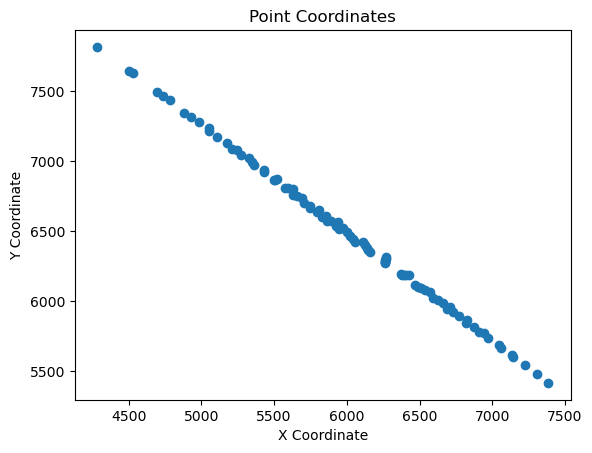

In [45]:
import matplotlib.pyplot as plt

points = [[6267.6973, 6311.451],

       [6428.384 , 6182.625 ],

       [6574.048 , 6065.8096],

       [6706.8394, 5959.3115],

       [6828.8433, 5861.482 ],

       [6940.076 , 5772.255 ],

       [7043.0815, 5689.639 ],

       [7138.434 , 5613.1646],

       [7227.0503, 5542.1045],

       [7308.7163, 5476.587 ],

       [7384.808 , 5415.542 ],

       [5938.6396, 6560.5815],

       [6110.1577, 6423.7407],

       [6266.681 , 6298.85  ],

       [6408.9536, 6185.3013],

       [6540.3833, 6080.437 ],

       [6661.807 , 5983.5723],

       [6773.0605, 5894.785 ],

       [6875.981 , 5812.645 ],

       [6972.033 , 5736.001 ],

       [7061.2954, 5664.773 ],

       [7144.335 , 5598.5015],

       [5626.5737, 6796.8525],

       [5807.8677, 6652.7705],

       [5973.849 , 6520.8677],

       [6125.738 , 6400.1543],

       [6265.3286, 6289.216 ],

       [6394.3945, 6186.6504],

       [6513.171 , 6092.2354],

       [6623.9536, 6004.1987],

       [6727.0728, 5922.2524],

       [6822.663 , 5846.271 ],

       [6911.8184, 5775.4053],

       [5330.0835, 7021.3247],

       [5520.5425, 6870.47  ],

       [5694.2305, 6732.8765],

       [5854.254 , 6606.114 ],

       [6001.591 , 6489.407 ],

       [6137.7046, 6381.5835],

       [6264.1855, 6281.405 ],

       [6381.5264, 6188.458 ],

       [6490.425 , 6102.1875],

       [6592.2754, 6021.5044],

       [6687.5605, 5946.0303],

       [5049.0376, 7234.096 ],

       [5246.2993, 7078.2534],

       [5427.8955, 6934.8013],

       [5594.5576, 6803.1387],

       [5748.7017, 6681.363 ],

       [5891.588 , 6568.4956],

       [6024.223 , 6463.719 ],

       [6147.785 , 6366.1167],

       [6263.2417, 6274.9263],

       [6370.2573, 6190.374 ],

       [6470.87  , 6110.8975],

       [4781.485 , 7436.6484],

       [4985.706 , 7275.6934],

       [5173.29  , 7127.839 ],

       [5346.7744, 6991.1094],

       [5507.0547, 6864.7847],

       [5655.5127, 6747.7725],

       [5794.093 , 6638.56  ],

       [5922.7944, 6537.124 ],

       [6043.1704, 6442.2573],

       [6155.982 , 6353.354 ],

       [6261.7534, 6270.002 ],

       [4526.627 , 7629.6006],

       [4736.4106, 7464.5737],

       [4930.014 , 7312.285 ],

       [5108.922 , 7171.5586],

       [5274.843 , 7041.0513],

       [5428.848 , 6919.912 ],

       [5572.571 , 6806.8687],

       [5706.2686, 6701.705 ],

       [5831.652 , 6603.09  ],

       [5948.8525, 6510.901 ],

       [6059.01  , 6424.2627],

       [4284.0215, 7813.265 ],

       [4498.907 , 7644.518 ],

       [4697.637 , 7488.4653],

       [4881.4595, 7344.116 ],

       [5052.271 , 7209.991 ],

       [5210.9585, 7085.384 ],

       [5359.146 , 6969.0234],

       [5497.682 , 6860.246 ],

       [5627.302 , 6758.4688],

       [5749.076 , 6662.8545],

       [5863.2964, 6573.1714]]


# 分离x和y坐标
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

# 创建散点图
plt.scatter(x_coords, y_coords)

# 为图表添加标题和坐标轴标签
plt.title('Point Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# 显示图表
plt.show()